# CONTEXTO

Variables que conforman el dataset:
Se uso una muestra de 50 datos para la siguiente relación;
1. Revenues: revenue per concert in each state
2. Advertising: advertising expenditure
3. Stadium: stadium capacity
4. Cd: quantity of cd ́s sold before the concert
5. Radio: number of band radio interviews before the concert
6. Weekend: variable that represents if the concert was held on weekend
7. Population: state population

# INSTALAR LIBRERIAS

In [28]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install setuptools==58 # Importante para poder usar regressors
!pip install regressors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.3/816.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
  Using cached regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12590 sha256=36e0ceb21346f77336dcc7829b39d98637b3f3d8471673d076c42b4e9f72c061
  Stored in directory: /Users/erickfernandochaconflores/Library/Caches/pip/wheels/08/ca/2c/42d5ea6e6b11d224ede7e428e4384c0d86d4021d332cd913da
Successfully built regressors


# IMPORTAR LIBRERIAS

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

from regressors import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import * #(* quiere decir que voy a importar todas las funciones de la libreria) 

# IMPORTAR DATASET

In [6]:
df = pd.read_csv('/Users/erickfernandochaconflores/Downloads/concert.csv')
df.columns = ['Gasto_MK', 'Q_CDs', 'Habitantes_Estado', 'Entrevistas_Radio', 'Ingresos', 'Cap_Estadio', 'Fin_Semana']
df.head()

,Gasto_MK,Q_CDs,Habitantes_Estado,Entrevistas_Radio,Ingresos,Cap_Estadio,Fin_Semana
0,87397,4370,4369862,1,1396500,21000,0
1,18585,1239,619500,1,475000,5000,0
2,95567,9557,4778332,1,2090000,22000,1
3,51027,7654,2551373,2,1520000,16000,0
4,331451,33145,33145121,5,4940000,52000,0


In [7]:
df.tail()

,Gasto_MK,Q_CDs,Habitantes_Estado,Entrevistas_Radio,Ingresos,Cap_Estadio,Fin_Semana
45,137458,13746,6872912,2,2074800,26000,0
46,115127,11513,5756361,2,2137500,25000,0
47,54208,1807,1806928,1,1330000,14000,0
48,105009,10501,5250446,2,2052000,24000,0
49,14388,959,479602,1,380000,4000,0


# GRÁFICAR

Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

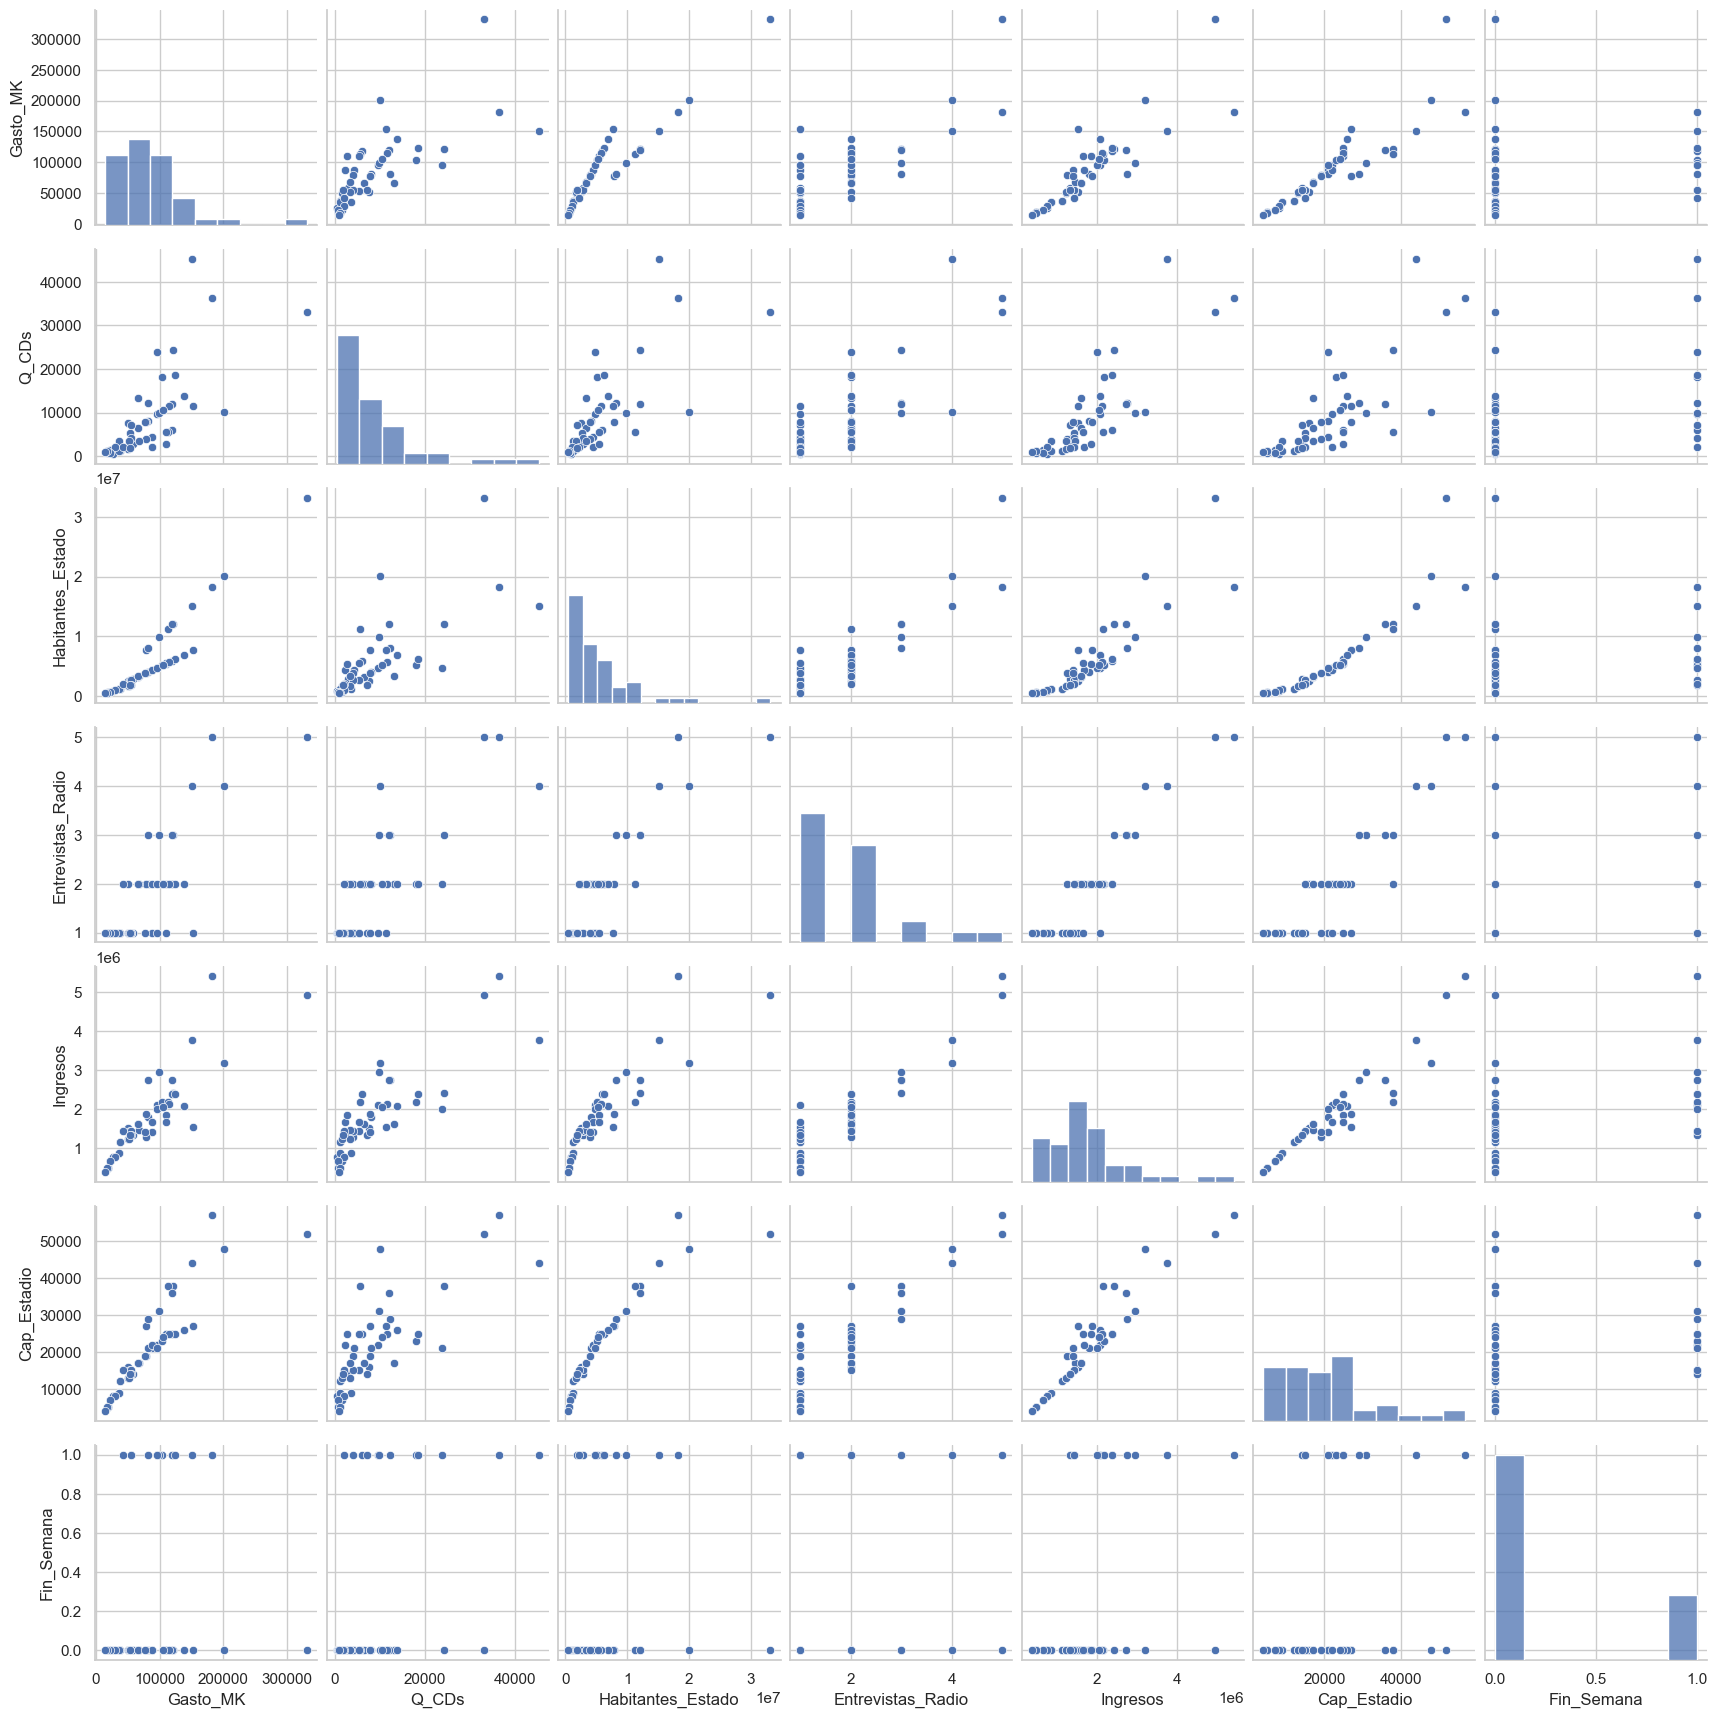

In [9]:
#Gráficos de dispersión

sns.set(style='whitegrid', context='notebook')
cols = ['Gasto_MK', 'Q_CDs', 'Habitantes_Estado', 'Entrevistas_Radio', 'Ingresos', 'Cap_Estadio', 'Fin_Semana']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

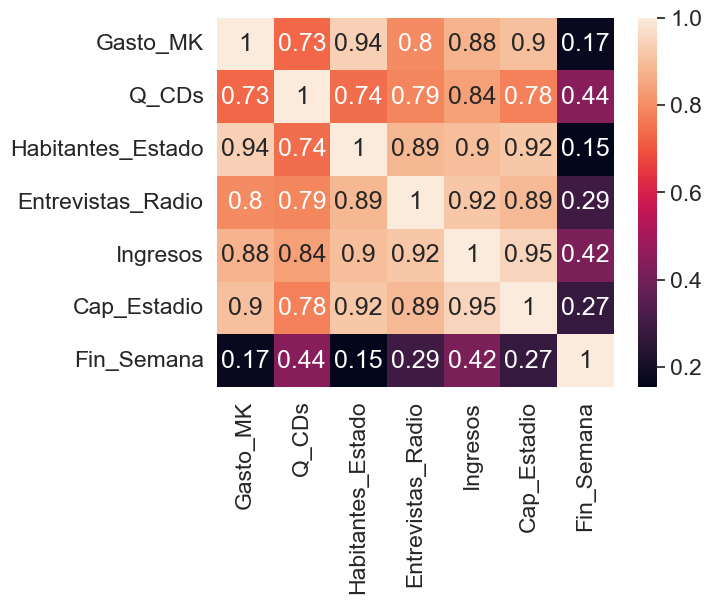

In [10]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

# MODELO DE REGRESIÓN

In [16]:
# Almaceno las variables inpendientes en X_cols y la variable dependiente en y_col
X_cols = list(set(df.columns)-set(['Ingresos']))
y_col = ['Ingresos']

# .values : Se utiliza en este código para convertir los datos contenidos en un DataFrame de pandas en un formato de matriz 
X = df[X_cols].values
y = df[y_col].values

# Haciendo la partición del dataset. Dataset de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Definiendo la estandarización de las variables
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Corriendo el modelo
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
# Hay 13 predicciones en una columna
y_pred.shape

(13, 1)

In [19]:
# Calidad del modelo
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print ("r2: ", r2.round(4))
print ("mse: ", mse.round(4))

r2:  0.9169
mse:  0.0496


In [30]:
# Estadisticos y coeficientes

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("==========Resumen Estadistico==========")
stats.summary(model, X_test, y_test, X_cols)

==========Resumen Estadistico==========
Residuals:
    Min      1Q  Median     3Q    Max
-0.3474 -0.1263  0.0265 0.1553 0.4091


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.006845    0.072940   0.0938  0.926785
Q_CDs              0.103286    0.114057   0.9056  0.382987
Entrevistas_Radio  0.364018    0.166610   2.1848  0.049462
Fin_Semana         0.179747    0.074146   2.4242  0.032069
Gasto_MK           0.147853    0.233382   0.6335  0.538280
Habitantes_Estado  0.006261    0.583178   0.0107  0.991610
Cap_Estadio        0.367509    0.421380   0.8722  0.400237
---
R-squared:  0.91694,    Adjusted R-squared:  0.83388
F-statistic: 11.04 on 6 features


# PREDICCIÓN

In [41]:

# Supongamos que tienes un modelo de regresión lineal llamado 'model' previamente entrenado.
# También supongamos que tienes objetos StandardScaler llamados 'sc_x' y 'sc_y' previamente creados.

# Definiendo Inputs
Q_CDs = 4370
Entrevistas_Radio = 1
Fin_Semana = 0
Gasto_MK = 87397
Habitantes_Estado = 4369862
Cap_Estadio = 21000

# Coloca tus datos de entrada en una matriz de características
X_pred = np.array([[Q_CDs, Entrevistas_Radio, Fin_Semana, Gasto_MK, Habitantes_Estado, Cap_Estadio]])

# Escala todas las características juntas
X_pred_std = sc_x.transform(X_pred)

# Realiza la predicción
predicted_price_std = model.predict(X_pred_std)

# Invierte la escala de la predicción si es necesario (si ya tienes un objeto StandardScaler llamado 'sc_y')
predicted_price_actual_scale = sc_y.inverse_transform(predicted_price_std.reshape(-1, 1))

print("Los ingresos del concierto serán de:", predicted_price_actual_scale[0][0])


Los ingresos del concierto serán de: 1340663.9167002067
